# Biobank data analysis 
## - Part 1 : DBSCAN for clustering
## - part 2 : Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import matplotlib.cm as cm
import matplotlib.animation as animation
import datetime
from dateutil.relativedelta import relativedelta
#import imblearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as skm
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# import data
df = pd.read_csv(r'./df_cluster_encoded_result.csv')

# drop last two columns
df = df.drop( columns=['kmedoid_cluster', 'kmeans_cluster',
                       '21003-2.0', '31-0.0']  )
print( df.shape )
df.head()

(5772, 46)


,eid,20458-0.0,20459-0.0,20460-0.0,20479-0.0,20485-0.0,20495-0.0,20497-0.0,20498-0.0,20505-0.0,...,21052-0.0,21053-0.0,21054-0.0,21055-0.0,21056-0.0,21057-0.0,21058-0.0,21059-0.0,21060-0.0,21061-0.0
0,1000993,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0
1,1001367,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,1003110,1.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
3,1003823,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
4,1004315,3.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,...,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0


In [2]:
# checking columns
df.columns

Index(['eid', '20458-0.0', '20459-0.0', '20460-0.0', '20479-0.0', '20485-0.0',
       '20495-0.0', '20497-0.0', '20498-0.0', '20505-0.0', '20506-0.0',
       '20507-0.0', '20508-0.0', '20509-0.0', '20510-0.0', '20511-0.0',
       '20512-0.0', '20513-0.0', '20514-0.0', '20515-0.0', '20516-0.0',
       '20517-0.0', '20518-0.0', '20519-0.0', '20520-0.0', '21025-0.0',
       '21033-0.0', '21034-0.0', '21040-0.0', '21041-0.0', '21042-0.0',
       '21043-0.0', '21044-0.0', '21048-0.0', '21049-0.0', '21051-0.0',
       '21052-0.0', '21053-0.0', '21054-0.0', '21055-0.0', '21056-0.0',
       '21057-0.0', '21058-0.0', '21059-0.0', '21060-0.0', '21061-0.0'],
      dtype='object')

In [3]:
# minmax scaler
min_max_scaler = MinMaxScaler()
df_mm = pd.DataFrame( min_max_scaler.fit_transform( df.drop(columns=['eid']) ) )

#0. Indexing
df_mm.set_index( df['eid'],inplace=True)

# 1. replacing column names
df_mm = df_mm.set_axis( [ '20458-0.0', '20459-0.0', '20460-0.0', '20479-0.0',
       '20485-0.0', '20495-0.0', '20497-0.0', '20498-0.0', '20505-0.0',
       '20506-0.0', '20507-0.0', '20508-0.0', '20509-0.0', '20510-0.0',
       '20511-0.0', '20512-0.0', '20513-0.0', '20514-0.0', '20515-0.0',
       '20516-0.0', '20517-0.0', '20518-0.0', '20519-0.0', '20520-0.0',
       '21025-0.0', '21033-0.0', '21034-0.0', '21040-0.0', '21041-0.0',
       '21042-0.0', '21043-0.0', '21044-0.0', '21048-0.0', '21049-0.0',
       '21051-0.0', '21052-0.0', '21053-0.0', '21054-0.0', '21055-0.0',
       '21056-0.0', '21057-0.0', '21058-0.0', '21059-0.0', '21060-0.0',
       '21061-0.0'], axis=1, inplace=False)

print(df_mm.shape)
df_mm.head()

(5772, 45)


,20458-0.0,20459-0.0,20460-0.0,20479-0.0,20485-0.0,20495-0.0,20497-0.0,20498-0.0,20505-0.0,20506-0.0,...,21052-0.0,21053-0.0,21054-0.0,21055-0.0,21056-0.0,21057-0.0,21058-0.0,21059-0.0,21060-0.0,21061-0.0
eid,,,,,,,,,,,,,,,,,,,,,
1000993,0.2,0.2,0.75,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,0.666667,0.5,1.0,0.5,0.5
1001367,0.2,0.2,0.75,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,1.0,1.0
1003110,0.2,0.4,0.50,1.0,0.5,0.25,0.0,0.00,0.333333,0.333333,...,1.0,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,1.0,0.5
1003823,0.2,0.0,0.75,0.0,0.0,0.00,0.0,0.25,0.000000,0.000000,...,0.5,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,0.5,0.5
1004315,0.6,0.8,0.50,1.0,1.0,0.00,0.0,0.00,0.666667,0.333333,...,1.0,0.5,1.0,0.5,0.5,1.000000,1.0,0.5,0.0,0.5


c2_linkage = linkage(df_mm, 'complete', 'cosine') 
## List of Distance measures

*   “euclidean”: sqrt(sum((x - y)^2))
*   “manhattan” : sum(|x - y|)
*   “minkowski” : sum(|x - y|^p)^(1/p)
*   “wminkowski” : sum(|w * (x - y)|^p)^(1/p)
*   “seuclidean” : sqrt(sum((x - y)^2 / V))
*   “mahalanobis” : sqrt((x - y)' V^-1 (x - y))

In [5]:
# Run hierarchical clustering on this subset with Euclidean distance as the dissimilarity measure.

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix
from scipy import cluster

linkage1 = linkage(df_mm, 'complete','euclidean') 
linkage2 = linkage(df_mm, 'complete', 'cosine')
linkage3 = linkage(df_mm, 'average','chebyshev') 
linkage4 = linkage(df_mm, 'complete', 'mahalanobis') 
linkage5 = linkage(df_mm, 'complete', 'minkowski') 

# 4 groups assignment
group_num = 4
cuttree1 = cluster.hierarchy.cut_tree(linkage1, n_clusters = group_num)
cuttree2 = cluster.hierarchy.cut_tree(linkage2, n_clusters = group_num)
cuttree3 = cluster.hierarchy.cut_tree(linkage3, n_clusters = group_num)
cuttree4 = cluster.hierarchy.cut_tree(linkage4, n_clusters = group_num)
cuttree5 = cluster.hierarchy.cut_tree(linkage5, n_clusters = group_num)

# make outputs as a dataframe
import itertools
cut_tree1 = itertools.chain(*cuttree1)
cut_tree2 = itertools.chain(*cuttree2)
cut_tree3 = itertools.chain(*cuttree3)
cut_tree4 = itertools.chain(*cuttree4)
cut_tree5 = itertools.chain(*cuttree5)

two_group_df = {'c1': cut_tree1, 
                'c2': cut_tree2, 
                'c3': cut_tree3,
                'c4': cut_tree4,
                'c5': cut_tree5 
               }

two_group_df =pd.DataFrame(data=two_group_df)


In [6]:
# check value counts
print(
    two_group_df['c1'].value_counts(),
    two_group_df['c2'].value_counts(),
    two_group_df['c3'].value_counts(),
    two_group_df['c4'].value_counts(),
    two_group_df['c5'].value_counts()
)

0    5482
2     140
3      78
1      72
Name: c1, dtype: int64 0    5362
2     163
1     128
3     119
Name: c2, dtype: int64 0    5767
1       3
3       1
2       1
Name: c3, dtype: int64 0    5689
3      34
2      32
1      17
Name: c4, dtype: int64 0    5482
2     140
3      78
1      72
Name: c5, dtype: int64


In [7]:
two_group_df['c1'].values

array([0, 0, 0, ..., 0, 0, 0])

In [5]:
df_mm['com_euc'] = two_group_df['c1'].values
df_mm['com_cos'] = two_group_df['c2'].values
df_mm['ave_che'] = two_group_df['c3'].values
df_mm['com_mah'] = two_group_df['c4'].values
df_mm['com_min'] = two_group_df['c5'].values

df_mm.head()

,20458-0.0,20459-0.0,20460-0.0,20479-0.0,20485-0.0,20495-0.0,20497-0.0,20498-0.0,20505-0.0,20506-0.0,...,21057-0.0,21058-0.0,21059-0.0,21060-0.0,21061-0.0,com_euc,com_cos,ave_che,com_mah,com_min
eid,,,,,,,,,,,,,,,,,,,,,
1000993,0.2,0.2,0.75,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,...,0.666667,0.5,1.0,0.5,0.5,0,0,0,0,0
1001367,0.2,0.2,0.75,0.0,0.0,0.00,0.0,0.00,0.000000,0.000000,...,0.666667,1.0,1.0,1.0,1.0,0,0,0,0,0
1003110,0.2,0.4,0.50,1.0,0.5,0.25,0.0,0.00,0.333333,0.333333,...,0.666667,1.0,1.0,1.0,0.5,0,0,0,0,0
1003823,0.2,0.0,0.75,0.0,0.0,0.00,0.0,0.25,0.000000,0.000000,...,0.666667,1.0,1.0,0.5,0.5,0,0,0,0,0
1004315,0.6,0.8,0.50,1.0,1.0,0.00,0.0,0.00,0.666667,0.333333,...,1.000000,1.0,0.5,0.0,0.5,0,0,0,0,0


In [74]:

class PCA_implementation:
  def __init__(self):
    self.X_centered = None
    self.values =     None
    self.vectors =    None

  def fit(self, X):
    self.X_centered = X - np.mean(X, axis=0)
    X_cov = np.cov(self.X_centered.T) 
    self.values,self.vectors = np.linalg.eig(X_cov)
    sort_index = np.argsort(self.values)[::-1]
    self.sort_values =  self.values[ sort_index ]   
    self.sort_vectors = self.vectors[ sort_index ]

  def transform(self, n_components):
    self.components = self.sort_vectors[0 : n_components]
    return np.dot(self.X_centered, self.components.T )

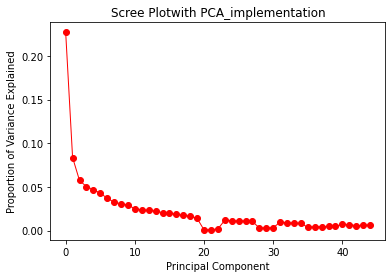

In [75]:
pca = PCA_implementation()
pca.fit(df_mm)
output = pca.transform(n_components = 45)
# save proportion of variance explained
variance = []
for i in range(0,45):
  variance.append( float((pca.values[i] / pca.values.sum() )) )

from sklearn.decomposition import PCA
pca_sklearn = PCA() 
pcs = pca_sklearn.fit_transform(df_mm)

# scree plot
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
PC_values = range(0,  len(pca.components) ) 
plt.plot(PC_values, variance, 'ro-', linewidth=1)
plt.title('Scree Plotwith PCA_implementation')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Text(0, 0.5, 'Pearson correlation distance')

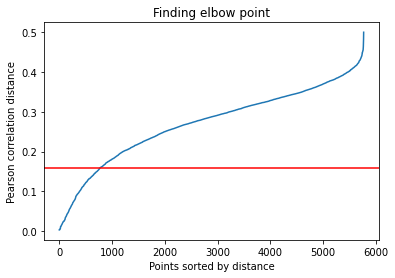

In [6]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA
pca_sklearn = PCA() 
pcs = pca_sklearn.fit_transform(df_mm)

p = 20 # pick first 20 PCs
k = p + 1
input_data = pcs[:,0:p]

corr_distance = pairwise_distances(input_data , metric='correlation') # Peasron correlation distance

# plot to visualiza sorted distance -> to find optimal epsilon value
sort = np.sort(np.sort(corr_distance, axis=0)[15,:] )
plt.plot(sort)
plt.axhline(y=0.16, color='r', linestyle='-') # it seems like when eps=0.16 is the elbow point
plt.title('Finding elbow point')
plt.xlabel('Points sorted by distance')
plt.ylabel('Pearson correlation distance')

/home/ks6017/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


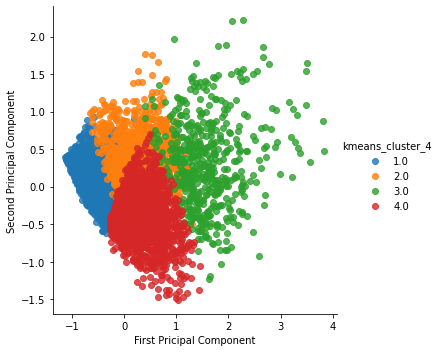

/home/ks6017/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


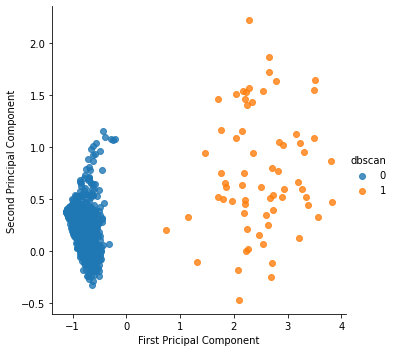

In [15]:
# plot
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import metrics
from sklearn.metrics import f1_score
from scipy.spatial.distance import correlation
from scipy.stats import pearsonr

df = pd.read_csv('./brain_56cols_kmeans4.csv')
df.set_index('eid', inplace=True)

epsilon = 0.15  # from previous plot
min_point = k   # also from previous exercise

# build DBSCAN
clustering = DBSCAN(eps= epsilon,  
                    metric='correlation',  
                    min_samples= min_point).fit( input_data  )

df_mm['dbscan'] = clustering.labels_

# removing noise group (=-1)
df['dbscan'] = df_mm['dbscan']
df['pc1'] = pcs[:, 0] 
df['pc2'] = pcs[:, 1] 
df_fit = df[ (df['dbscan']>=0)  ]

# visualize
ax = sns.lmplot('pc1', 'pc2',   data=df, hue='kmeans_cluster_4', fit_reg=False)
ax.set(xlabel='First Pricipal Component', 
       ylabel='Second Principal Component')
plt.show()

ax = sns.lmplot('pc1', 'pc2', data=df_fit, hue='dbscan', fit_reg=False)
ax.set(xlabel='First Pricipal Component', 
       ylabel='Second Principal Component')
plt.show()

/home/ks6017/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


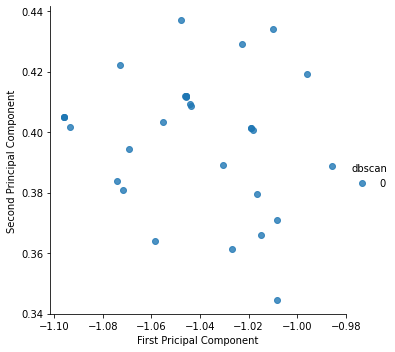

/home/ks6017/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


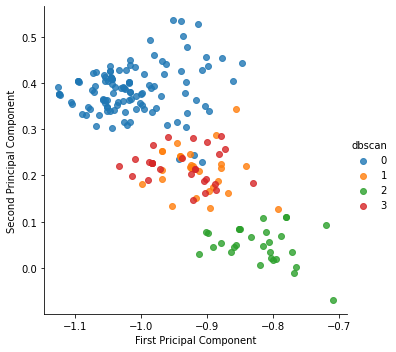

/home/ks6017/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


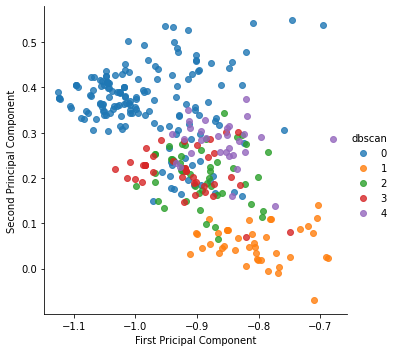

/home/ks6017/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


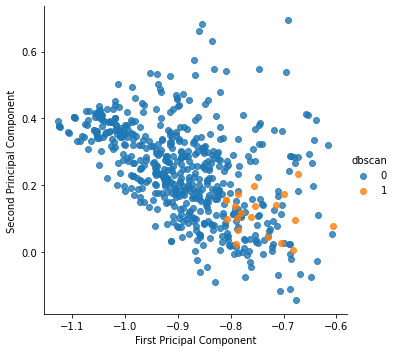

/home/ks6017/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


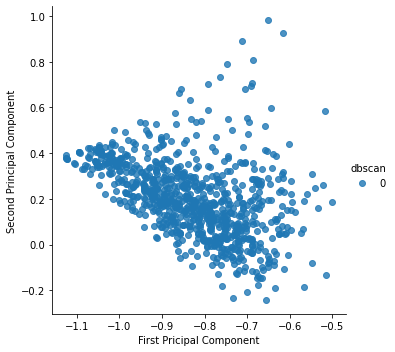

/home/ks6017/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


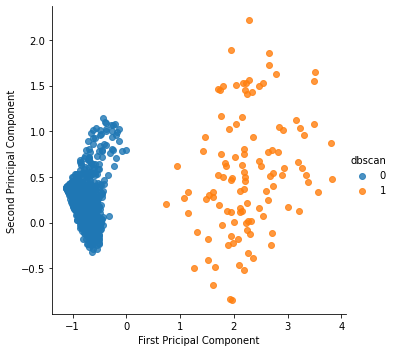

/home/ks6017/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


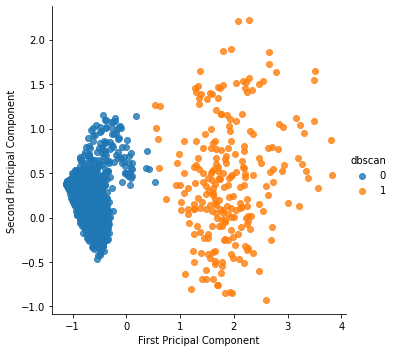

/home/ks6017/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


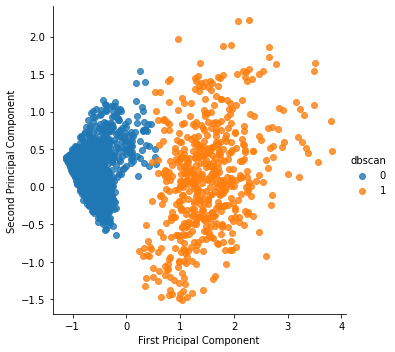

/home/ks6017/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


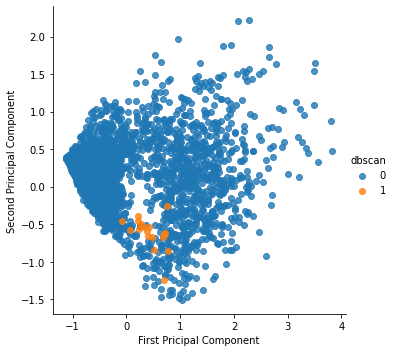

/home/ks6017/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


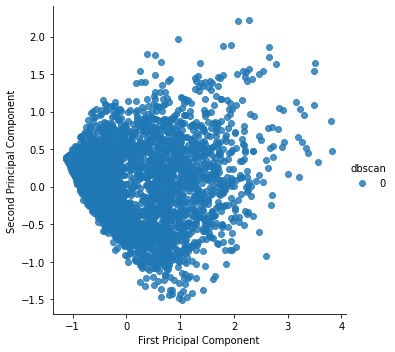

In [22]:
# Visualize with different epsilon value with loop

for i in np.arange(0.01, 0.3, 0.03):
    epsilon = i  # from previous plot
    min_point = k   # also from previous exercise
    
    clustering = DBSCAN(eps= epsilon, metric='correlation', min_samples= min_point).fit( input_data  )
    df_mm['dbscan'] = clustering.labels_
    df['dbscan'] = df_mm['dbscan']
    df['pc1'] = pcs[:, 0] 
    df['pc2'] = pcs[:, 1] 
    df_fit = df[ (df['dbscan']>=0)  ]
    
    ax = sns.lmplot('pc1', 'pc2', data=df_fit, hue='dbscan', fit_reg=False)
    ax.set(xlabel='First Pricipal Component', 
           ylabel='Second Principal Component')
    plt.show()

# Part2: Prediction (GI symptom (cluster with K-medoid) + Brain activity )

In [23]:
# import
df_group = pd.read_csv('./df_cluster_encoded_result.csv') # try to get kmean , kmedoid groups

df = pd.read_csv('./brain_56cols_kmeans4.csv')
df['kmedoid_cluster'] = df_group['kmedoid_cluster'] # add k-medoid grop as well
# set index
df.set_index('eid', inplace=True)

# look at how many samples we have for each class
df.groupby('kmeans_cluster_4')['25011-2.0'].count()

kmeans_cluster_4
1.0    2404
2.0     756
3.0     442
4.0    1466
Name: 25011-2.0, dtype: int64

In [24]:
# copy data
df_fil = df.copy()

# drop rows that have ANY missing values
df_fil.dropna(axis='index', how='any',inplace=True)

# drop k-medoid column
df_fil = df_fil.drop(['kmedoid_cluster'], axis=1)

# train-test set split: stratify against the target column so both train and test have the same proportion of classes
train, test = train_test_split(df_fil, test_size=0.25, 
                               random_state=42, 
                               stratify=df_fil['kmeans_cluster_4'])

In [25]:
df_fil

,kmeans_cluster_4,25011-2.0,25012-2.0,25019-2.0,25020-2.0,25021-2.0,25022-2.0,25094-2.0,25095-2.0,25109-2.0,...,25850-2.0,25851-2.0,25862-2.0,25863-2.0,25878-2.0,25879-2.0,25886-2.0,25887-2.0,25888-2.0,25889-2.0
eid,,,,,,,,,,,,,,,,,,,,,
1000993,1.0,7731.0,7798.0,3910.0,4245.0,1481.0,1323.0,0.517769,0.519163,0.001549,...,1710.89,1691.51,1429.820,1287.030,3145.17,3160.96,4046.24,4464.16,1750.55,2023.10
1001367,1.0,7712.0,7561.0,2717.0,2798.0,812.0,1438.0,0.517108,0.530976,0.001884,...,1502.23,1268.06,833.469,1054.980,2786.42,2908.76,4114.25,3344.82,1962.76,1933.99
1003823,1.0,9106.0,8354.0,3648.0,4132.0,1427.0,1598.0,0.565555,0.531572,0.001712,...,1597.97,1450.46,1437.600,1474.350,2980.77,3193.36,4215.36,4552.72,1968.82,2229.03
1004315,3.0,7774.0,7386.0,3662.0,3993.0,1419.0,1154.0,0.576219,0.592066,0.001249,...,1864.38,1367.66,1831.850,1502.120,2645.42,2665.90,4192.30,4237.17,1914.12,2132.89
1004449,1.0,7523.0,7673.0,2610.0,3705.0,1316.0,1508.0,0.594285,0.555879,0.001604,...,1350.34,1224.34,1498.140,1497.800,2519.22,2432.88,3369.10,4056.99,1993.78,2184.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6021110,1.0,8437.0,8315.0,4418.0,4572.0,1023.0,1439.0,0.525815,0.527737,0.001491,...,2190.75,1491.06,1837.540,1142.600,2634.73,2791.85,4734.81,4616.08,2015.03,2285.03
6022430,1.0,8719.0,8696.0,3783.0,4457.0,1232.0,1103.0,0.559929,0.543902,0.001473,...,1934.18,1320.40,1607.760,996.861,3141.70,3147.11,4667.01,4261.81,1938.88,2067.67
6022902,1.0,8657.0,8190.0,3722.0,3936.0,1310.0,1278.0,0.565539,0.547002,0.001360,...,1614.21,1425.42,1783.970,1093.770,2900.77,2860.61,4399.94,4767.57,1859.00,2357.13


Text(0.5, 0.98, 'distributions of classes after split')

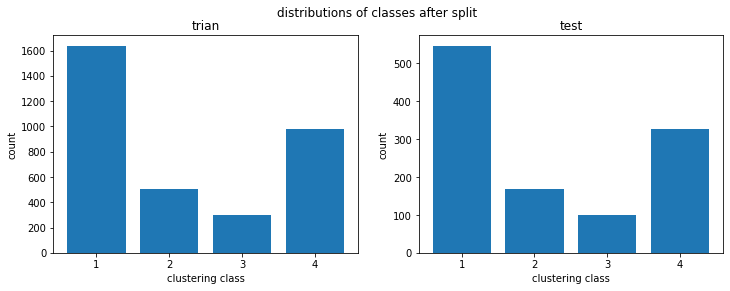

In [26]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].bar(x = [1,2,3,4], height=train.groupby('kmeans_cluster_4')['25011-2.0'].count(), 
        tick_label = ['1','2','3','4'])
ax[0].set_xlabel('clustering class')
ax[0].set_ylabel('count')
# ax[0].set_ylim(top=2000)
  # put it on the same scale as the original
ax[0].set_title('trian')

ax[1].bar(x = [1,2,3,4], height=test.groupby('kmeans_cluster_4')['25011-2.0'].count(), 
        tick_label = ['1','2','3','4'])
ax[1].set_xlabel('clustering class')
ax[1].set_ylabel('count')
# ax[1].set_ylim(top=2500)
  # put it on the same scale as the original
ax[1].set_title('test')
fig.suptitle('distributions of classes after split')

In [27]:
# split into X and y
X_train = train.drop('kmeans_cluster_4', axis=1)
y_train = train['kmeans_cluster_4']
X_test = test.drop('kmeans_cluster_4', axis=1)
y_test = test['kmeans_cluster_4']

In [28]:
# fit on train only, then transform both train the test
mm = MinMaxScaler()
X_train_norm = mm.fit_transform(X_train)
X_test_norm = mm.transform(X_test)

In [29]:
# instantiate a model object
lr = LogisticRegressionCV(cv=5, 
                          multi_class='multinomial',
                          max_iter=1000, solver='saga')
  # anything less than 500 do not have enough time to converge

# fit the model to training data
lr.fit(X_train_norm, y_train)

# predict
lr_predict = lr.predict(X_test_norm)

from sklearn.metrics import confusion_matrix
from sklearn import metrics
print( metrics.classification_report( y_test, lr_predict ) )

              precision    recall  f1-score   support

         1.0       0.48      0.99      0.65       546
         2.0       0.00      0.00      0.00       167
         3.0       0.00      0.00      0.00       100
         4.0       0.46      0.02      0.04       326

    accuracy                           0.48      1139
   macro avg       0.24      0.25      0.17      1139
weighted avg       0.36      0.48      0.32      1139



/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# instantiate a model object
rf = RandomForestClassifier(n_estimators=100, 
                            class_weight="balanced")

# fit the model to training data (not normalized)
rf.fit(X_train_norm, y_train)

# predict
rf_predict = rf.predict(X_test_norm)

print( metrics.classification_report( y_test, rf_predict ) )

# AUC score
print(roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr') ,
      roc_auc_score(y_test, rf.predict_proba(X_test_norm), multi_class='ovr') )

              precision    recall  f1-score   support

         1.0       0.48      0.93      0.63       546
         2.0       0.00      0.00      0.00       167
         3.0       0.00      0.00      0.00       100
         4.0       0.35      0.08      0.13       326

    accuracy                           0.47      1139
   macro avg       0.21      0.25      0.19      1139
weighted avg       0.33      0.47      0.34      1139

0.48620414787740607 0.5182829595289007


/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ks6017/.local/lib/python3.8/site-p

In [42]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier(n_estimators=100, 
                        learning_rate = 1.2,
                        #base_estimator_splitter = "best", 
                        #n_estimators = 1,
                        random_state=0)

# fit the model to training data (not normalized)
ab.fit(X_train_norm, y_train)

# predict
ab_predict = ab.predict(X_test_norm)

from sklearn.metrics import roc_auc_score
print(confusion_matrix(y_test, ab_predict))
print( metrics.classification_report( y_test, ab_predict ) )

# calculating AUC score
roc_auc1 = []
predict_list = [ab_predict]

for i in range(0,1):
  fpr, tpr, thres = metrics.roc_curve(y_test, predict_list[i], pos_label=1)
  roc_auc = metrics.auc(fpr, tpr)
  roc_auc1.append(roc_auc)

roc_auc1

# AUC score
print(roc_auc_score(y_test, ab.predict_proba(X_test), multi_class='ovr') ,
      roc_auc_score(y_test, ab.predict_proba(X_test_norm), multi_class='ovr') )

[[424  22  20  80]
 [135   8   6  18]
 [ 76   5   8  11]
 [242  12  12  60]]
              precision    recall  f1-score   support

         1.0       0.48      0.78      0.60       546
         2.0       0.17      0.05      0.07       167
         3.0       0.17      0.08      0.11       100
         4.0       0.36      0.18      0.24       326

    accuracy                           0.44      1139
   macro avg       0.30      0.27      0.26      1139
weighted avg       0.37      0.44      0.38      1139

0.5112216413197872 0.5207145375303847


/home/ks6017/.local/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


kmeans_cluster_4
1.0    2404
2.0     756
3.0     442
4.0    1466
Name: 25011-2.0, dtype: int64

In [43]:
from sklearn import svm

# 3. model fitting and prediction
svm_model1 = svm.SVC(kernel='linear').fit(X_train, y_train) # define the model
svm_model2 = svm.SVC(kernel='linear', 
                     class_weight="balanced").fit(X_train, y_train) # define the model
svm_model3 = svm.SVC(kernel="poly", degree=3 , 
                     class_weight="balanced").fit(X_train, y_train) # define the model
svm_model4 = svm.SVC(kernel='rbf',
                     class_weight="balanced").fit(X_train, y_train) # define the model
svm_model5 = svm.SVC(kernel="poly", degree=2 , 
                     class_weight="balanced").fit(X_train, y_train) # define the model

svm_predict1 = svm_model1.predict(X_test) # predict
svm_predict2 = svm_model2.predict(X_test) # predict
svm_predict3 = svm_model3.predict(X_test) # predict
svm_predict4 = svm_model4.predict(X_test) # predict
svm_predict5 = svm_model5.predict(X_test) # predict

# 4. see the performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix
# Linear SVM without parameter tuning
matrix1 = confusion_matrix(y_test, svm_predict1)
print("Linear SVM without parameter tuning")
print(matrix1)
print( classification_report(y_test, svm_predict1) )

# SVM Linear with soft margin
matrix2 = confusion_matrix(y_test, svm_predict2)
print("SVM Linear with soft margin")
print(matrix2)
print( classification_report(y_test, svm_predict2) )

# SVM with 3rd order polynomial
matrix3 = confusion_matrix(y_test, svm_predict3)
print("SVM with 3rd order polynomial")
print(matrix3)
print( classification_report(y_test, svm_predict3) )

# SVM with radial basis
matrix4 = confusion_matrix(y_test, svm_predict4)
print("SVM with radial basis")
print(matrix4)
print( classification_report(y_test, svm_predict4) )

# SVM with 2nd order polynomial
matrix5 = confusion_matrix(y_test, svm_predict5)
print("SVM with radial basis")
print(matrix5)
print( classification_report(y_test, svm_predict5) )

# calculating AUC score
roc_auc1 = []
predict_list = [svm_predict1, svm_predict2, svm_predict3, svm_predict4]

for i in range(0,4):
  fpr, tpr, thres = metrics.roc_curve(y_test, predict_list[i], pos_label=1)
  roc_auc = metrics.auc(fpr, tpr)
  roc_auc1.append(roc_auc)

roc_auc1

# AUC score
print(roc_auc_score(y_test, svm_model1.predict_proba(X_test), multi_class='ovr') ,
      roc_auc_score(y_test, svm_model2.predict_proba(X_test), multi_class='ovr') ,
      roc_auc_score(y_test, svm_model3.predict_proba(X_test), multi_class='ovr') ,
      roc_auc_score(y_test, svm_model4.predict_proba(X_test), multi_class='ovr') ,
      roc_auc_score(y_test, svm_model5.predict_proba(X_test), multi_class='ovr') )

Linear SVM without parameter tuning
[[485   0   1  60]
 [143   0   0  24]
 [ 83   0   0  17]
 [270   0   0  56]]
              precision    recall  f1-score   support

         1.0       0.49      0.89      0.64       546
         2.0       0.00      0.00      0.00       167
         3.0       0.00      0.00      0.00       100
         4.0       0.36      0.17      0.23       326

    accuracy                           0.47      1139
   macro avg       0.21      0.27      0.22      1139
weighted avg       0.34      0.47      0.37      1139

SVM Linear with soft margin
[[137 177 171  61]
 [ 36  46  61  24]
 [ 19  33  34  14]
 [ 66 107 115  38]]
              precision    recall  f1-score   support

         1.0       0.53      0.25      0.34       546
         2.0       0.13      0.28      0.17       167
         3.0       0.09      0.34      0.14       100
         4.0       0.28      0.12      0.16       326

    accuracy                           0.22      1139
   macro avg       0.

/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AttributeError: predict_proba is not available when  probability=False

In [ ]:
# calculating AUC score
roc_auc1 = []
predict_list = [svm_predict1, svm_predict2, svm_predict3, svm_predict4]

for i in range(0,4):
  fpr, tpr, thres = metrics.roc_curve(y_test, predict_list[i], pos_label=1)
  roc_auc = metrics.auc(fpr, tpr)
  roc_auc1.append(roc_auc)

roc_auc1

# AUC score
print(roc_auc_score(y_test, svm_model1.predict_proba(X_test), multi_class='ovr') ,
      roc_auc_score(y_test, svm_model2.predict_proba(X_test), multi_class='ovr') ,
      roc_auc_score(y_test, svm_model3.predict_proba(X_test), multi_class='ovr') ,
      roc_auc_score(y_test, svm_model4.predict_proba(X_test), multi_class='ovr') ,
      roc_auc_score(y_test, svm_model5.predict_proba(X_test), multi_class='ovr') )

In [22]:
X_test.shape

(1139, 55)

In [44]:
pd.DataFrame(y_train).shape

(3416, 1)

# Deep learing approach
## 1. predict k-means cluster groups

In [53]:
#!pip install keras
#!pip install tensorflow
import keras
import tensorflow as tf


# ======= import  =======
df_group = pd.read_csv('./df_cluster_encoded_result.csv') # try to get kmean , kmedoid groups

df = pd.read_csv('./brain_56cols_kmeans4.csv')
df['kmedoid_cluster'] = df_group['kmedoid_cluster'] # add k-medoid grop as well
df.set_index('eid', inplace=True) # set index

# look at how many samples we have for each class
df.groupby('kmeans_cluster_4')['25011-2.0'].count()


# ======= train-test split  =======
# copy data
df_fil = df.copy()
# drop rows that have ANY missing values
df_fil.dropna(axis='index', how='any',inplace=True)
    # drop k-medoid column
df_fil.drop(['kmedoid_cluster'], axis=1)
    # drop k-means column
#df_fil.drop(['kmeans_cluster_4'], axis=1)
train, test = train_test_split(df_fil, 
                               test_size=0.25, 
                               random_state=42, 
                               stratify=df_fil['kmeans_cluster_4'])
# split into X and y
X_train = train.drop(['kmeans_cluster_4','kmedoid_cluster'], axis=1)
y_train = train['kmeans_cluster_4']
X_test = test.drop(['kmeans_cluster_4','kmedoid_cluster'], axis=1)
y_test = test['kmeans_cluster_4']
print(X_train.shape, y_train.shape,  X_test.shape,  y_test.shape )
print( y_train.value_counts() )
print( y_test.value_counts() )

# fit on train only, then transform both train the test
mm = MinMaxScaler()
X_train_norm = mm.fit_transform(X_train)
X_test_norm = mm.transform(X_test)

#num_classes = 4
#y_train = tf.keras.utils.to_categorical(y_train, ) # because we have 4 classes
#y_test = tf.keras.utils.to_categorical(y_test, ) # because we have 4 classes
#print( y_train.shape, y_test.shape )

(3416, 55) (3416,) (1139, 55) (1139,)
1.0    1638
4.0     979
2.0     501
3.0     298
Name: kmeans_cluster_4, dtype: int64
1.0    546
4.0    326
2.0    167
3.0    100
Name: kmeans_cluster_4, dtype: int64


In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# model
model_d = keras.Sequential([layers.Dense(1000, activation="relu", input_dim=55),
                            layers.Dense(500, activation="relu"),
                            layers.Dense(100, activation="relu"),
                            layers.Dense(10, activation="relu"),
                            layers.Dense(5, activation="relu"),
                            layers.Dense(units=1, activation='softmax') ,
    ])
# early stopping
early_stop = EarlyStopping(monitor='loss', 
                           mode='min', 
                           verbose=1, patience=25)

#compile model
model_d.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy', 'AUC'])

#train the model
model_d.fit(X_train, y_train, 
            #validation_data=(X_validation, y_validation), 
            #validation_data=(X_test, y_test),verbose=1,
            callbacks=[early_stop],
            epochs=50, 
            batch_size=64)

print(model_d.summary())
test_results = model_d.evaluate(X_test, y_test, verbose=1)

print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Epoch 1/50
54/54 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4795 - auc: 0.0000e+00
Epoch 2/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4795 - auc: 0.0000e+00
Epoch 3/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4795 - auc: 0.0000e+00
Epoch 4/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4795 - auc: 0.0000e+00
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4795 - auc: 0.0000e+00
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4795 - auc: 0.0000e+00
Epoch 7/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4795 - auc: 0.0000e+00
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4795 - auc: 0.0000e+00
Epoch 9/50
54/54 [======================

In [52]:
test_results

[1.2339918613433838, 0.47936785221099854, 0.7892888784408569]

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

#predictions = model_d.predict_classes(X_test)

predictions = model_d.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[546   0   0   0]
 [167   0   0   0]
 [100   0   0   0]
 [326   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.48      1.00      0.65       546
         2.0       0.00      0.00      0.00       167
         3.0       0.00      0.00      0.00       100
         4.0       0.00      0.00      0.00       326

    accuracy                           0.48      1139
   macro avg       0.12      0.25      0.16      1139
weighted avg       0.23      0.48      0.31      1139



/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#y_train.astype('int')

# Deep learing approach

## 2. predict k-medoid cluster groups

In [61]:
import keras
import tensorflow as tf

# ======= import  =======
df_group = pd.read_csv('./df_cluster_encoded_result.csv') # try to get kmean , kmedoid groups

df = pd.read_csv('./brain_56cols_kmeans4.csv')
df['kmedoid_cluster'] = df_group['kmedoid_cluster'] # add k-medoid grop as well
df.set_index('eid', inplace=True) # set index

# ======= train-test split  =======
# copy data
df_fil = df.copy()
# drop rows that have ANY missing values
df_fil.dropna(axis='index', how='any',inplace=True)
    # drop k-medoid column
df_fil.drop(['kmedoid_cluster'], axis=1)
    # drop k-means column
#df_fil.drop(['kmeans_cluster_4'], axis=1)

train, test = train_test_split(df_fil, 
                               test_size=0.25, 
                               random_state=42, 
                               stratify=df_fil['kmedoid_cluster'])
# split into X and y
X_train = train.drop(['kmeans_cluster_4','kmedoid_cluster'], axis=1)
y_train = train['kmedoid_cluster']
X_test = test.drop(['kmeans_cluster_4','kmedoid_cluster'], axis=1)
y_test = test['kmedoid_cluster']

print(X_train.shape, y_train.shape,  X_test.shape,  y_test.shape )
print( y_train.value_counts() )
print( y_test.value_counts() )

# fit on train only, then transform both train the test
mm = MinMaxScaler()
X_train_norm = mm.fit_transform(X_train)
X_test_norm = mm.transform(X_test)

#num_classes = 4
#y_train = tf.keras.utils.to_categorical(y_train, ) # because we have 4 classes
#y_test = tf.keras.utils.to_categorical(y_test, ) # because we have 4 classes
#print( y_train.shape,     y_test.shape )

(3416, 55) (3416,) (1139, 55) (1139,)
1.0    811
4.0    774
5.0    706
2.0    577
3.0    548
Name: kmedoid_cluster, dtype: int64
1.0    270
4.0    258
5.0    236
2.0    193
3.0    182
Name: kmedoid_cluster, dtype: int64


In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

#create model
model_d = keras.Sequential([layers.Dense(500, activation="relu", input_dim=55),
                            layers.Dense(100, activation="relu"),
                            layers.Dense(50, activation="relu"),
                            layers.Dense(10, activation="relu"),
                            layers.Dense(5, activation="relu"),
                            layers.Dense(units=1, activation='softmax') ,
                            #layers.Dense(units=1, activation='sigmoid') ,
    ])

early_stop = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=25)

#compile model using accuracy to measure model performance
model_d.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy', 'AUC'])

#print(model_d.summary())
#train the model
model_d.fit(X_train, y_train, 
            callbacks=[early_stop],
            epochs=100, 
            batch_size=16)

print(model_d.summary())
test_results = model_d.evaluate(X_test, y_test, verbose=1)

print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Epoch 1/100
214/214 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2374 - auc: 0.0000e+00
Epoch 2/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2374 - auc: 0.0000e+00
Epoch 3/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2374 - auc: 0.0000e+00
Epoch 4/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2374 - auc: 0.0000e+00
Epoch 5/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2374 - auc: 0.0000e+00
Epoch 6/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2374 - auc: 0.0000e+00
Epoch 7/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2374 - auc: 0.0000e+00
Epoch 8/100
214/214 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2374 - auc: 0.0000e+00
Epoch 9/100
214/

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

#predictions = model_d.predict_classes(X_test)

predictions = model_d.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[270   0   0   0   0]
 [193   0   0   0   0]
 [182   0   0   0   0]
 [258   0   0   0   0]
 [236   0   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.24      1.00      0.38       270
         2.0       0.00      0.00      0.00       193
         3.0       0.00      0.00      0.00       182
         4.0       0.00      0.00      0.00       258
         5.0       0.00      0.00      0.00       236

    accuracy                           0.24      1139
   macro avg       0.05      0.20      0.08      1139
weighted avg       0.06      0.24      0.09      1139



/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ks6017/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
